In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [4]:
# Reading whale returns
whale_returns_csv = Path("/Users/akshaynyamala/Documents/Homework-3/Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
print(whale_returns.isnull().sum())
print(whale_returns[whale_returns.isnull().any(axis = 1)])

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [7]:
 # Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [11]:
# Reading algorithmic returns
algo_returns_csv = Path("/Users/akshaynyamala/Documents/Homework-3/Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [12]:
# Count nulls
print(algo_returns.isnull().sum())

Algo 1    0
Algo 2    6
dtype: int64


In [13]:
 # Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [14]:
# Reading sp tsx 60
sp_tsx_history_csv_path = Path("/Users/akshaynyamala/Documents/Homework-3/Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx_history_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True).sort_index(ascending=True)
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [17]:
#undertanding the dtype
sp_tsx_history.dtypes

Close    object
dtype: object

In [18]:
#Replace ","
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace(',','')

In [19]:
sp_tsx_history.head()

,Close
Date,
2012-10-01,$12370.19
2012-10-02,$12391.23
2012-10-03,$12359.47
2012-10-04,$12447.68
2012-10-05,$12418.99


In [124]:
#Replace "$" as well as changing the datatype to float
sp_tsx_history["Close"]= sp_tsx_history["Close"].replace('$','').astype("float")

In [125]:
sp_tsx_history.sort_index(inplace = True)
sp_tsx_history

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [126]:
# Calculate Daily Returns
sp_tsx_history_returns = sp_tsx_history.pct_change()

In [127]:
#Drop Nulls
sp_tsx_history_returns.dropna(inplace = True)
sp_tsx_history_returns

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [128]:
# Replacig the close column to tsx60
sp_tsx_history_returns = sp_tsx_history_returns.rename(columns = {"Close":"tsx60"})
sp_tsx_history_returns.head()

,tsx60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [129]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns,sp_tsx_history_returns], axis = "columns",join = "inner")
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,tsx60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

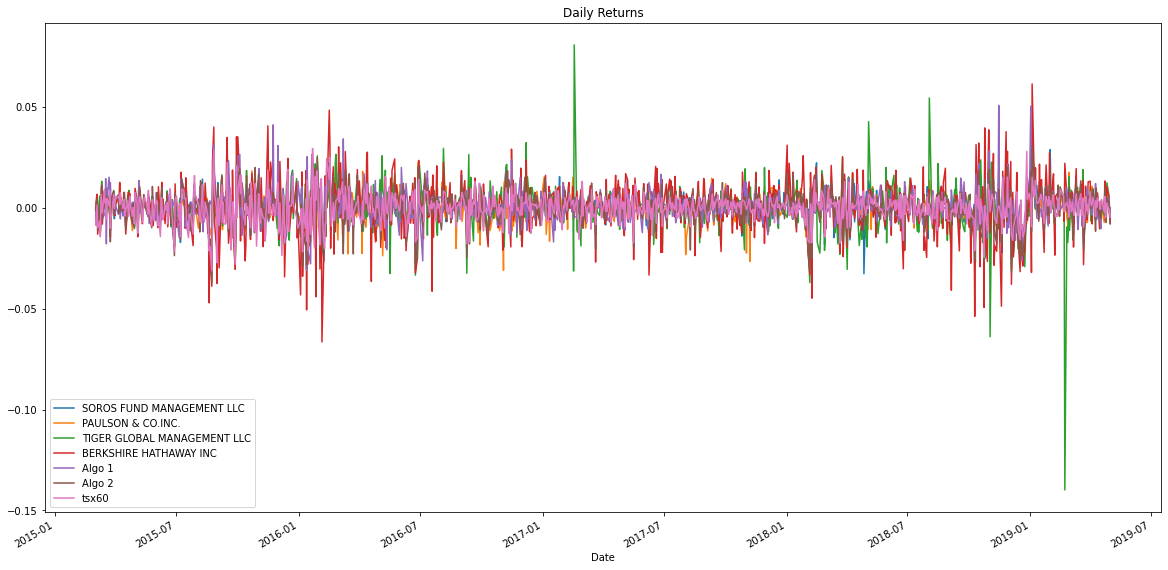

In [130]:
#Plotting the combined returns
combined_returns.plot( title="Daily Returns" , figsize=(20,10))

<AxesSubplot:xlabel='Date'>

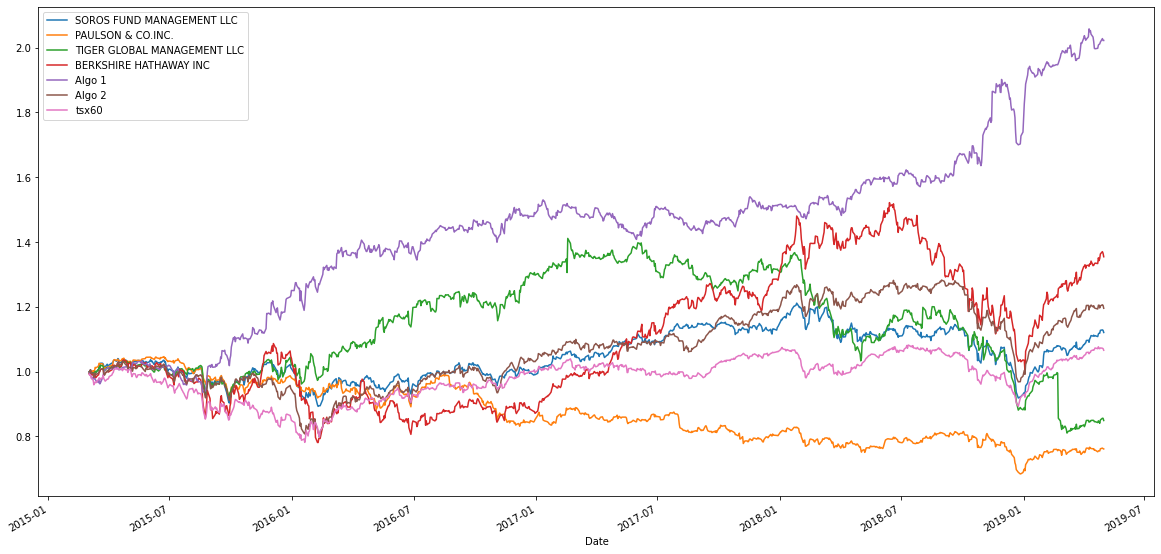

In [131]:
 # Calculate cumulative returns of all portfolios & plot them
cumilative_returns = (1+ combined_returns).cumprod()
cumilative_returns.plot(figsize = (20,10))

<AxesSubplot:>

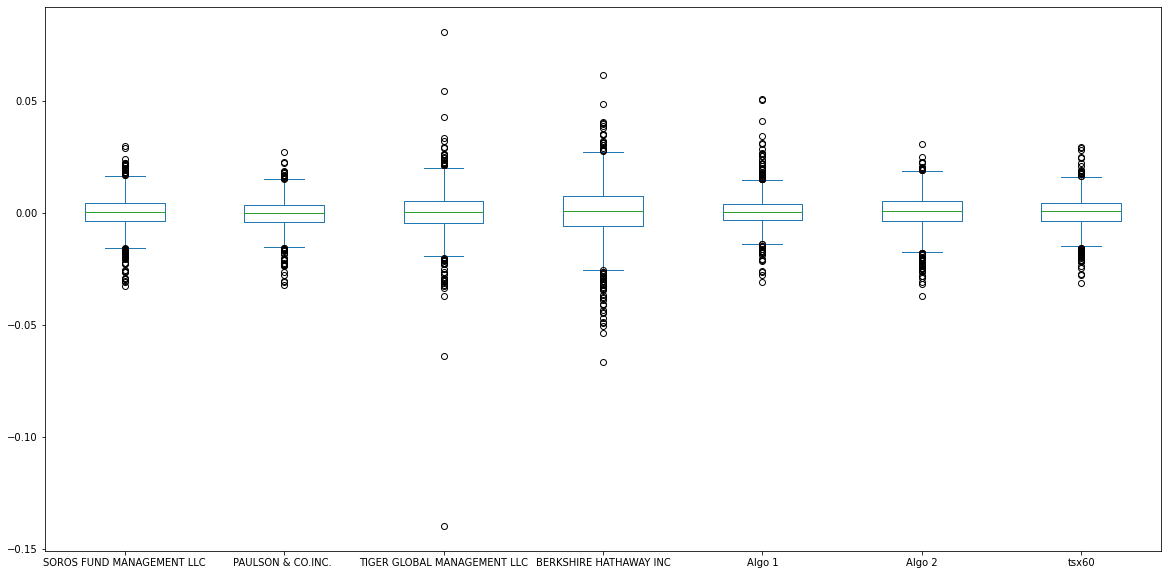

In [132]:
# Risk Analysis

# Box plot to visually show risk
combined_returns.plot( kind = "box" , figsize=(20,10))

In [133]:
# Calculate the daily standard deviations of all portfolios
daily_std = pd.DataFrame(combined_returns.std()).rename(columns = {0:"std"})
daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
tsx60,0.007034


In [134]:
# Determine which portfolios are riskier than the S&P TSX 60 - in this case the first "SOROS FUND & TIGER GLOBAL FUND are more volotile
higher_std = daily_std[daily_std["std"] > daily_std.loc["tsx60", "std"]]
higher_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


In [135]:
 # Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std*np.sqrt(252)
annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
tsx60,0.111664


<AxesSubplot:xlabel='Date'>

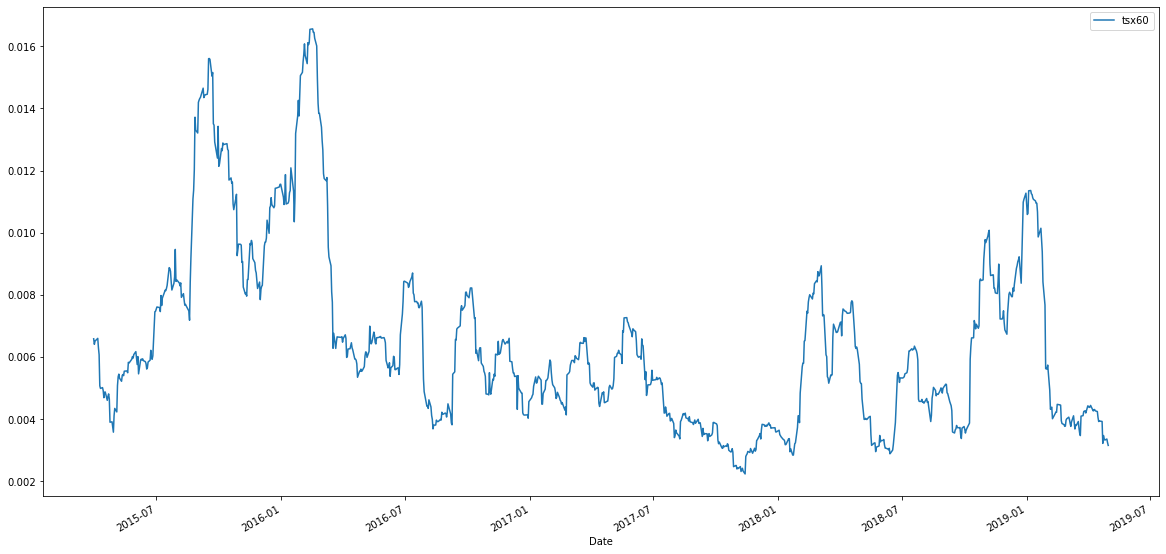

In [136]:
#Rolling Statistics

# Calculating the rolling standard deviation for all portfolios using a 21-day window
sp_tsx_rolling_21 = combined_returns[['tsx60']].rolling(window = 21).std()

# Plot the rolling standard deviation
sp_tsx_rolling_21.plot(figsize = (20,10))

In [137]:
# Calculate the correlation

correlation_tsx60 = pd.DataFrame(combined_returns.corr()).loc[:,"tsx60"]

# Display de correlation matrix
correlation_tsx60[correlation_tsx60==correlation_tsx60[correlation_tsx60<1].max()]

Algo 2    0.73737
Name: tsx60, dtype: float64

<AxesSubplot:xlabel='tsx60', ylabel='Algo 2'>

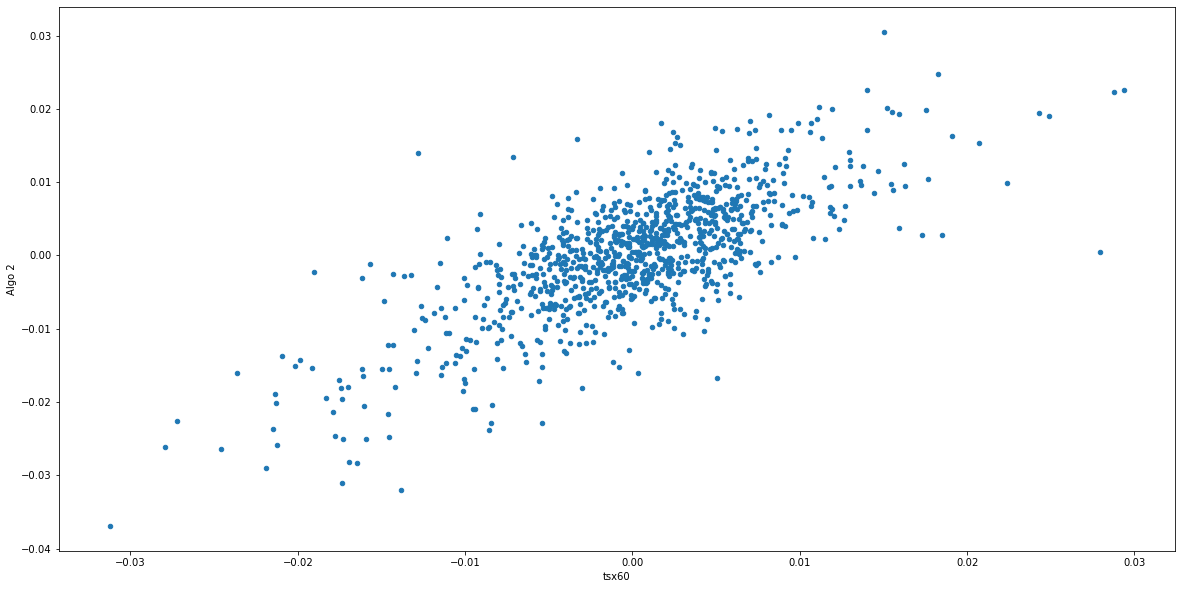

In [138]:
#Plotting in through scatter plot

combined_returns.plot(kind="scatter", y = "Algo 2", x = "tsx60", figsize = (20,10))

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BH'}, xlabel='Date'>

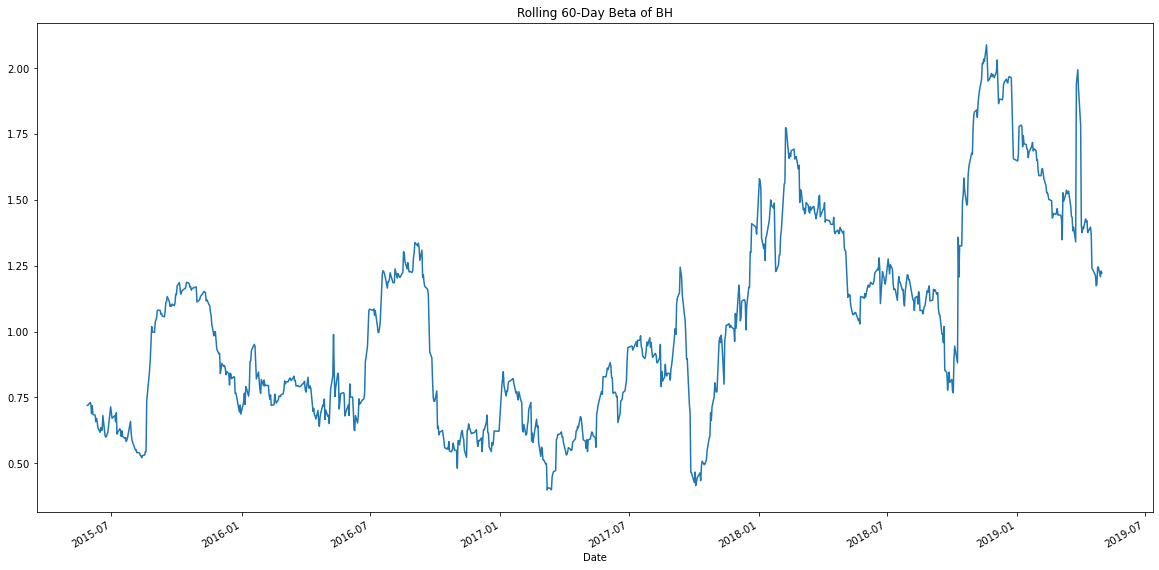

In [139]:
# Calculate Beta for a single portfolio compared to the total market (TSX 60)
rolling_covariance = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_returns['tsx60'])
rolling_variance = combined_returns['tsx60'].rolling(window=60).var()

# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
 rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')

<AxesSubplot:xlabel='Date'>

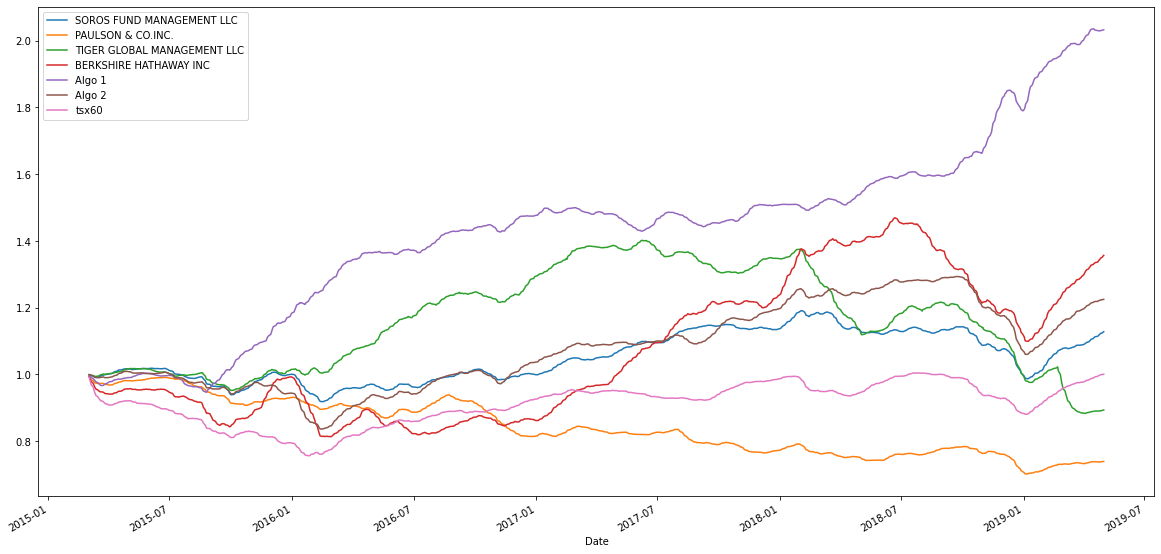

In [140]:
# Using `ewm` to calculate the rolling window

combined_returns_ewm = combined_returns.ewm(span = 21,adjust = False).mean()
(1+combined_returns_ewm).cumprod().plot(figsize = (20,10))

In [141]:
# Annualzied Sharpe Ratios
sharpe_ratios = combined_returns.mean()*252/(combined_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
tsx60                          0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

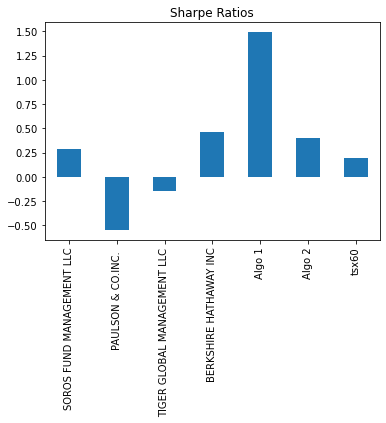

In [142]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

In [195]:
# Read the first stock
aapl_history = pd.read_csv(Path("/Users/akshaynyamala/Documents/Homework-3/Resources/Apple_StockPrice.csv"), index_col="Date",parse_dates = True, infer_datetime_format= True)
aapl_history.rename(columns = {"Close":"aapl"}, inplace = True)
aapl_history.head()

,aapl
Date,
2019-01-02 16:00:00,39.48
2019-01-03 16:00:00,35.55
2019-01-04 16:00:00,37.07
2019-01-07 16:00:00,36.98
2019-01-08 16:00:00,37.69


In [196]:
# Read the second stock
amzn_history = pd.read_csv(Path("/Users/akshaynyamala/Documents/Homework-3/Resources/Amazon_StockPrice.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
amzn_history.rename(columns = {"Close":"amzn"}, inplace = True)
amzn_history.head()

,amzn
Date,
2019-01-02 16:00:00,76.96
2019-01-03 16:00:00,75.01
2019-01-04 16:00:00,78.77
2019-01-07 16:00:00,81.48
2019-01-08 16:00:00,82.83


In [197]:
# Read the third stock
goog_history = pd.read_csv(Path("/Users/akshaynyamala/Documents/Homework-3/Resources/Google_StockPrice.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
goog_history.rename(columns = {"Close":"goog"}, inplace = True)
goog_history.head()

,goog
Date,
2019-01-02 16:00:00,52.29
2019-01-03 16:00:00,50.80
2019-01-04 16:00:00,53.54
2019-01-07 16:00:00,53.42
2019-01-08 16:00:00,53.81


In [198]:
# Concatenate all stocks into a single DataFrame
my_profile = pd.concat((aapl_history, amzn_history, goog_history), axis = 1, join= "inner")
my_profile.sort_index(ascending = True, inplace = True)
my_profile.head()

,aapl,amzn,goog
Date,,,
2019-01-02 16:00:00,39.48,76.96,52.29
2019-01-03 16:00:00,35.55,75.01,50.80
2019-01-04 16:00:00,37.07,78.77,53.54
2019-01-07 16:00:00,36.98,81.48,53.42
2019-01-08 16:00:00,37.69,82.83,53.81


In [231]:
# Reset Date index

my_profile.index = my_profile.index.normalize()

my_profile_returns = my_profile.pct_change()
my_profile_returns.dropna(inplace=True)
my_profile_returns

,aapl,amzn,goog
Date,,,
2019-01-03,-0.099544,-0.025338,-0.028495
2019-01-04,0.042757,0.050127,0.053937
2019-01-07,-0.002428,0.034404,-0.002241
2019-01-08,0.019200,0.016568,0.007301
2019-01-09,0.016981,0.001690,-0.001487
...,...,...,...
2019-12-23,0.016318,0.003582,-0.000593
2019-12-24,0.000986,-0.002119,-0.003855
2019-12-26,0.019840,0.044489,0.012504


In [232]:
# Drop Nulls

my_profile.dropna(inplace=True)

In [213]:
# Calculate weighted portfolio returns

weights = [1/3, 1/3, 1/3]
my_portfolio = my_profile.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns.head()

Date
2019-01-03   -0.043679
2019-01-04    0.049703
2019-01-07    0.014760
2019-01-08    0.014254
2019-01-09    0.004015
dtype: float64

In [242]:
portfolio_returns = pd.concat((my_portfolio_returns,combined_returns), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,tsx60
Date,,,,,,,,
2019-01-03,-0.043679,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.009368
2019-01-04,0.049703,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.015048
2019-01-07,0.014760,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.005373
2019-01-08,0.014254,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.006965
2019-01-09,0.004015,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.013665
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000382,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.012500,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001084,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [243]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,tsx60
Date,,,,,,,,
2019-01-03,-0.043679,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.009368
2019-01-04,0.049703,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.015048
2019-01-07,0.014760,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.005373
2019-01-08,0.014254,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.006965
2019-01-09,0.004015,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.013665
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000382,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.012500,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001084,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [244]:
# Risk
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

,std
my_portfolio,0.014916
SOROS FUND MANAGEMENT LLC,0.007292
PAULSON & CO.INC.,0.006778
TIGER GLOBAL MANAGEMENT LLC,0.017678
BERKSHIRE HATHAWAY INC,0.012546
Algo 1,0.005556
Algo 2,0.007543
tsx60,0.004543


In [245]:
higher_std = portfolio_std[portfolio_std["std"] > portfolio_std.loc["my_portfolio", "std"]]
higher_std

,std
TIGER GLOBAL MANAGEMENT LLC,0.017678


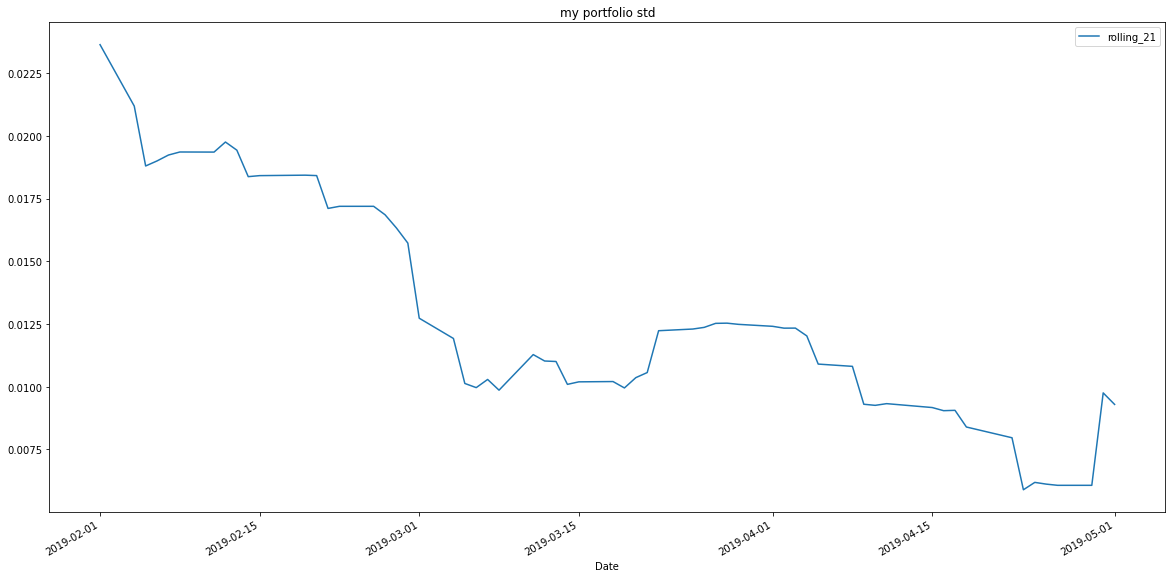

In [246]:
 # Calculate rolling standard deviation - 21 day
my_portfolio_rolling_15 = portfolio_returns[["my_portfolio"]].rolling(window = 21).std()

# Plotting the data
ax = my_portfolio_rolling_15.plot(figsize = (20,10), title = 'my portfolio std')
ax.legend(['rolling_21'])

In [266]:
# Calculate and plot the rolling covarinace
rolling_covariance = portfolio_returns['my_portfolio'].rolling(window=60).cov(portfolio_returns['my_portfolio'])

<AxesSubplot:title={'center':'Rolling 60-Day Beta of my portfolio'}, xlabel='Date'>

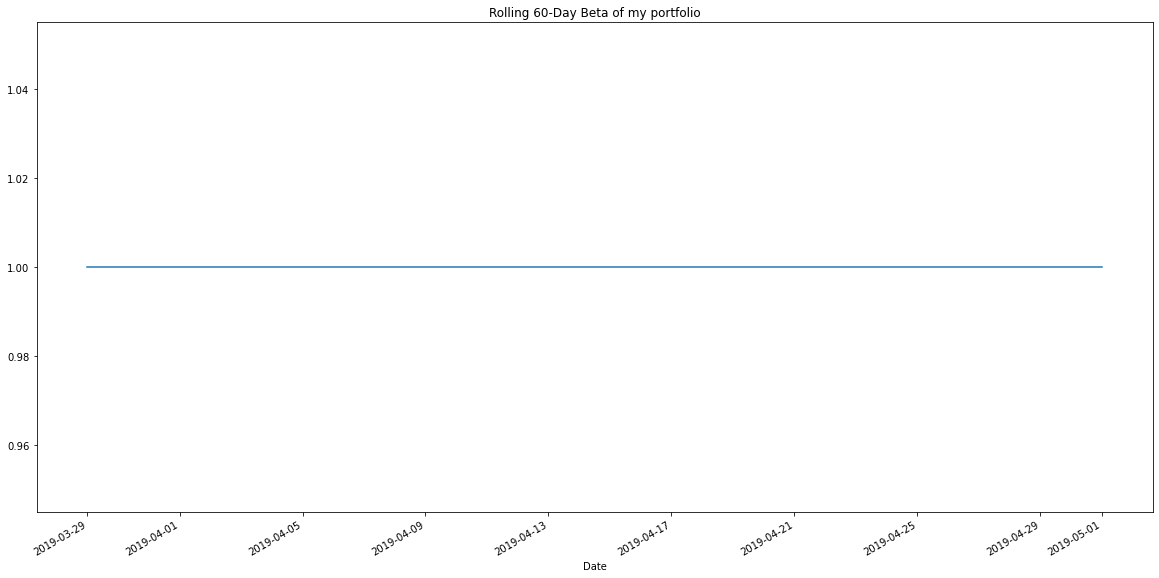

In [268]:
# Calculating variance and interpreting the Beta
rolling_variance = portfolio_returns['my_portfolio'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title ='Rolling 60-Day Beta of my portfolio')

In [254]:
# Annualzied Sharpe Ratios
trading_days = portfolio_returns.count()
sharpe_ratios = portfolio_returns.mean()*trading_days/(portfolio_returns.std()*np.sqrt(trading_days))

<AxesSubplot:title={'center':'sharpe ratios'}>

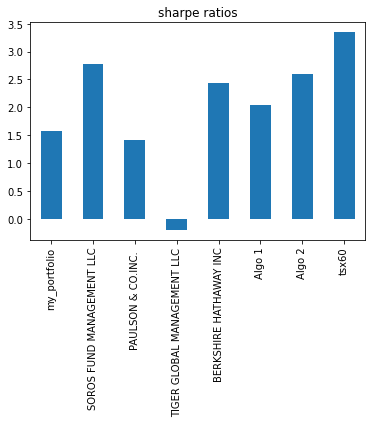

In [255]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

In [256]:
# Calculating the dependency
correlation_my_portfolio = portfolio_returns.corr().loc[:,"my_portfolio"]
correlation_my_portfolio[correlation_my_portfolio==correlation_my_portfolio[correlation_my_portfolio<1].max()]

BERKSHIRE HATHAWAY INC    0.789974
Name: my_portfolio, dtype: float64

In [ ]:
# My portolfolio is highly depended to Berkshire Hathaway company